In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# get HCFAI

In [ ]:
# Specify the path to your CSV file
# data_path = 'E:\\THESIS\\MS\\Data Collection - Preparation\\rg1-revised-cleaned-with-popcount-and-neighbors.csv'
region = 0
data_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_cleaned.csv'
df = pd.read_csv(data_path)
df.head(2)

,ID,barangay_name,city_name,province_name,children_m,elderly_me,women_mean,youth_mean,women_repr,phall_mean,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km
0,2971819,Santa Rosa,Santa Fe,Nueva Vizcaya,NaN,NaN,NaN,NaN,NaN,0.018628,0.20831,0.459051,0.78885,1.0,0,0,0,3010498,48.477583
1,2971820,Santa Rosa,Santa Fe,Nueva Vizcaya,0.079848,0.061421,0.497514,0.264112,0.264112,0.019324,0.20831,0.459051,0.78885,1.0,0,0,0,3010498,49.700157


In [ ]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name', 'children_m',
       'elderly_me', 'women_mean', 'youth_mean', 'women_repr', 'phall_mean',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km'],
      dtype='object')

In [ ]:
# Rename columns
column_mapping = {
    'children_m': 'popden_chi',
    'elderly_me': 'popden_eld',
    'women_mean': 'popden_wom',
    'women_repr': 'popden_w_1',
    'youth_mean': 'popden_you',
    'phall_mean': 'popden_all',
}

df = df.rename(columns=column_mapping)
df.loc[df['RHU_Presence'] == 1, 'Distance_to_Nearest_RHU_km'] = 0
df[df['RHU_Presence'] == 1]

,ID,barangay_name,city_name,province_name,popden_chi,popden_eld,popden_wom,popden_w_1,popden_you,popden_all,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km
807,3010498,Magsaysay,Bayombong,Nueva Vizcaya,1.461414,1.300771,7.799034,3.049395,4.166660,51.795012,0.162893,1.262402,0.959357,0.0,1,1,1,3010498,0.0
1264,3021546,Quirino (Pob.),Bagabag,Nueva Vizcaya,0.772326,0.677348,4.043088,1.480314,2.114931,12.678690,0.206512,1.645876,1.163817,0.0,1,0,1,3021546,0.0
3150,3050574,Santo Domingo,Cabarroguis,Quirino,0.455254,0.329996,2.179781,0.844559,1.174244,6.915970,0.082907,2.169374,1.338685,0.0,1,0,1,3050574,0.0
3362,3053325,San Andres,City of Santiago,Isabela,2.103643,1.396714,9.665222,3.756067,5.224663,38.316951,0.474231,1.601002,1.291514,0.0,1,0,1,3053325,0.0
3582,3056077,Marasat Grande,San Mateo,Isabela,0.814706,0.691381,4.014562,1.559281,2.156638,17.308538,0.411629,1.883474,1.345374,0.0,1,0,1,3056077,0.0
3978,3061526,Centro Norte (Pob.),Gattaran,Cagayan,0.517585,0.658638,2.995213,1.046700,1.523354,9.966656,0.977867,2.121832,1.117003,1.0,1,0,1,3061526,0.0
4093,3062899,San Antonio (Lafu),Lal-Lo,Cagayan,0.323478,0.455172,2.121156,0.785874,1.107299,16.358113,1.068512,2.109604,1.119265,0.0,1,0,1,3062899,0.0
4338,3065658,Dacal-Lafugu,Camalaniugan,Cagayan,0.640680,0.419354,2.923832,1.112454,1.456091,3.283822,1.090831,2.070016,0.969110,0.0,1,0,1,3065658,0.0
4447,3065788,Poblacion Norte,Maddela,Quirino,0.541086,0.373347,2.500770,0.855324,1.322962,13.426816,0.057850,2.326756,1.134502,0.0,1,0,1,3065788,0.0
4508,3067087,Barangay II (Pob.),Enrile,Cagayan,0.836565,0.958659,4.227356,1.860313,2.101663,14.313834,1.130800,1.076408,1.261255,0.0,1,0,1,3067087,0.0


In [ ]:
df.loc[df['RHU_Presence'] == 1, 'Distance_to_Nearest_RHU_km'] = 0
df

In [ ]:
# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['popden_chi', 'popden_eld', 'popden_wom', 'popden_w_1', 'popden_you', 'popden_all', 'buildability_landcov']


In [ ]:
# Impute NaNs with 0, considering data type safety
for col in columns_with_nan:
    # Check data type before imputing (avoid unintended conversions)
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)  # Impute with 0 for numeric columns
    else:
        df[col] = df[col].fillna('NA')  # Impute with 'NA' for non-numeric columns
df

,ID,barangay_name,city_name,province_name,popden_chi,popden_eld,popden_wom,popden_w_1,popden_you,popden_all,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km
0,2971819,Santa Rosa,Santa Fe,Nueva Vizcaya,0.000000,0.000000,0.000000,0.000000,0.000000,0.018628,0.208310,0.459051,0.788850,1.0,0,0,0,3010498,48.477583
1,2971820,Santa Rosa,Santa Fe,Nueva Vizcaya,0.079848,0.061421,0.497514,0.264112,0.264112,0.019324,0.208310,0.459051,0.788850,1.0,0,0,0,3010498,49.700157
2,2971821,Santa Rosa,Santa Fe,Nueva Vizcaya,0.117420,0.104102,0.736892,0.370015,0.392883,0.030707,0.208310,0.459051,0.788850,1.0,0,0,0,3010498,50.744800
3,2973198,Lawigan,Kayapa,Nueva Vizcaya,0.000000,0.000000,0.000000,0.000000,0.000000,0.177869,0.134009,0.468439,0.711947,1.0,0,0,0,3010498,45.206873
4,2973199,Lawigan,Kayapa,Nueva Vizcaya,0.000000,0.000000,0.000000,0.000000,0.000000,0.042857,0.134009,0.468439,0.711947,1.0,0,0,0,3010498,46.230098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10512,3151422,Maligaya,Palanan,Isabela,0.319667,0.146579,1.164836,0.562926,0.556689,0.345868,0.006853,1.705597,0.793593,1.0,0,0,0,3086463,66.962931
10513,3151423,Maligaya,Palanan,Isabela,0.319667,0.146579,1.164836,0.562926,0.556689,0.692665,0.006853,1.705597,0.793593,1.0,0,0,0,3086463,66.930478
10514,3151424,Maligaya,Palanan,Isabela,0.000000,0.000000,0.000000,0.000000,0.000000,0.146973,0.006853,1.705597,0.793593,1.0,0,0,0,3086463,67.053552
10515,3151425,Dicadyuan,Palanan,Isabela,0.000000,0.000000,0.000000,0.000000,0.000000,1.119415,1.108305,1.755969,0.866171,1.0,0,0,0,3086463,67.199882


In [ ]:
columns_with_nan = [col for col in df.columns if df[col].isna().any()]
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [ ]:
def HCI_calc(total_ai, total_gi, total_hi, total_ji, total_ki, total_mi,
              distance, road_bi, POI_ci, landCov_di, hazard1_ei, hazard2_ei, hazard3_ei, rhus_fi):

    total_vulnerable = total_gi + total_hi + total_ji + total_ki + total_mi
    total_pop = total_ai
    population_to_be_served = total_vulnerable + np.maximum(0, total_pop - total_vulnerable)

    # Calculate y for the entire Series without using if condition
    y = np.where(population_to_be_served == 0, 0, 20000 / ((population_to_be_served) * (distance + rhus_fi)))
    mc = np.tanh(y)

    w_bi = 0.3 # roads
    w_ci = 0.2 # POIs
    w_di = 0.5 # land cov

    b = (POI_ci * w_ci) + (road_bi * w_bi) + (landCov_di * w_di)

    # Normalize each factor
    rain_intensity_normalized = (hazard1_ei - hazard1_ei.min()) / (hazard1_ei.max() - hazard1_ei.min())
    flood_probability_normalized = (hazard2_ei - hazard2_ei.min()) / (hazard2_ei.max() - hazard2_ei.min())
    drought_mean_normalized = (hazard3_ei - hazard3_ei.min()) / (hazard3_ei.max() - hazard3_ei.min())
    w_rain = 0.4
    w_flood = 0.3
    w_drought = 0.3
    c = (w_rain * rain_intensity_normalized) + (w_flood * flood_probability_normalized) + (w_drought * drought_mean_normalized)

    f = b - c
    f = np.tanh(f)

    hci = mc * f
    hcfai = (1 + np.tanh(hci / 2)) / 2  # Sigmoid function

    return hcfai

In [ ]:
# VARIABLES
# population vulnerable
popall = df["popden_all"]
children = df["popden_chi"]
elderly = df["popden_eld"]
women = df["popden_wom"]
women_reproductive = df["popden_w_1"]
youth = df["popden_you"]
distance = df["Distance_to_Nearest_RHU_km"]

flood = df["flood_probability_value"]
rain_intensity = df["rain intensity_value"]
drought = df["drought_value"]
roads = df["Road_Presence"]
rhus = df["RHU_Presence"]
pois = df["POI_Presence"]
buildability = df["buildability_landcov"]

In [ ]:
df['HCFAI'] = HCI_calc(popall, children, elderly, women, women_reproductive, youth, distance,
    roads, pois, buildability, drought, rain_intensity, flood, rhus)

# Data exploration and visualization

In [ ]:
print(max(list(df['HCFAI'].unique())))
# list(df['HCFAI'].unique())
print(min(list(df['HCFAI'].unique())))
# list(df['drought_value'])
# list(df['rain intensity_value'])
# list(df['flood_probability_value'])
for col in df.columns:
  print(col)

0.6579684164892353
0.3328031286883558
ID
barangay_name
city_name
province_name
popden_chi
popden_eld
popden_wom
popden_w_1
popden_you
popden_all
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
HCFAI


In [ ]:
# mid_to_high = []
# for i in list(df['HCFAI']):
#     if i >= 0.53:
#         mid_to_high.append(i)

# filtered_original_df = df[df['HCFAI'].isin(mid_to_high)]
# filtered_original_df = df[df['RHU_Presence'] == 1]

# x = df['HCFAI'].notna() # removing nan values
# x = df[x]
x=df[['popden_all', 'popden_you', "popden_w_1",
                      "popden_wom", "popden_eld", 'popden_chi',
                      'Distance_to_Nearest_RHU_km', "POI_Presence", "Road_Presence", "RHU_Presence",
                      'buildability_landcov', "drought_value", "rain intensity_value",
                         "flood_probability_value", "HCFAI"]]
x = x.sort_values(by='HCFAI', ascending=False)
# x[x['RHU_Presence']==0] # 4674 rows
x # 13420 rows
# len(locs_with_RHU['RHU_Presence'])

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
555,0.283942,0.703468,0.655450,1.486166,0.170465,0.364939,38.201450,1,1,0,1.0,0.681410,0.678594,0.154263,0.657968
328,2.415457,2.732109,1.795900,5.045625,0.616637,1.057736,34.286708,1,1,0,1.0,0.747831,0.651985,0.092563,0.657165
322,0.318211,0.840393,0.619864,1.448337,0.226489,0.321853,26.642827,1,1,0,1.0,0.712950,0.686499,0.182622,0.655710
1502,0.193036,0.553782,0.628170,1.049706,0.123981,0.169441,41.268272,1,1,0,1.0,0.563307,1.662370,0.035906,0.652083
1578,0.148158,0.553782,0.628170,1.049706,0.123981,0.169441,44.097676,1,1,0,1.0,0.563307,1.662370,0.035906,0.652083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,1.061146,0.736419,0.610790,1.517515,0.199092,0.382391,17.422011,0,0,0,0.0,1.238420,2.652417,1.241764,0.333969
2906,1.330636,0.875908,0.738698,1.820420,0.240914,0.457897,16.432103,0,0,0,0.0,1.238420,2.652417,1.241764,0.333969
2216,2.443944,1.707795,1.215352,3.323438,0.505577,0.776297,29.948722,0,0,0,0.0,1.178458,2.727682,1.345321,0.332803
2050,2.931506,0.716765,0.577254,1.357599,0.204698,0.297958,32.104831,0,0,0,0.0,1.178458,2.727682,1.345321,0.332803


In [ ]:
locs_with_RHU = x[x['RHU_Presence']==1] # 27 rows (bcos there are nan values we disregarded)
locs_with_RHU

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
807,51.795012,4.166660,3.049395,7.799034,1.300771,1.461414,0.0,1,1,1,0.0,0.959357,1.262402,0.162893,0.530821
4875,11.644909,1.289195,0.972798,2.504793,0.480446,0.456668,0.0,1,0,1,1.0,1.211957,1.170619,1.152933,0.510551
3978,9.966656,1.523354,1.046700,2.995213,0.658638,0.517585,0.0,1,0,1,1.0,1.117003,2.121832,0.977867,0.501444
1264,12.678690,2.114931,1.480314,4.043088,0.677348,0.772326,0.0,1,0,1,0.0,1.163817,1.645876,0.206512,0.428721
4447,13.426816,1.322962,0.855324,2.500770,0.373347,0.541086,0.0,1,0,1,0.0,1.134502,2.326756,0.057850,0.421162
3150,6.915970,1.174244,0.844559,2.179781,0.329996,0.455254,0.0,1,0,1,0.0,1.338685,2.169374,0.082907,0.409196
3362,38.316951,5.224663,3.756067,9.665222,1.396714,2.103643,0.0,1,0,1,0.0,1.291514,1.601002,0.474231,0.408392
4748,7.154487,1.337372,1.159164,2.542591,0.435521,0.468199,0.0,1,0,1,0.0,1.219604,1.718464,0.629195,0.403943
3582,17.308538,2.156638,1.559281,4.014562,0.691381,0.814706,0.0,1,0,1,0.0,1.345374,1.883474,0.411629,0.401032
5595,5.514771,0.533730,0.422800,1.034883,0.113270,0.240501,0.0,1,0,1,0.0,1.232773,1.280355,1.009718,0.396711


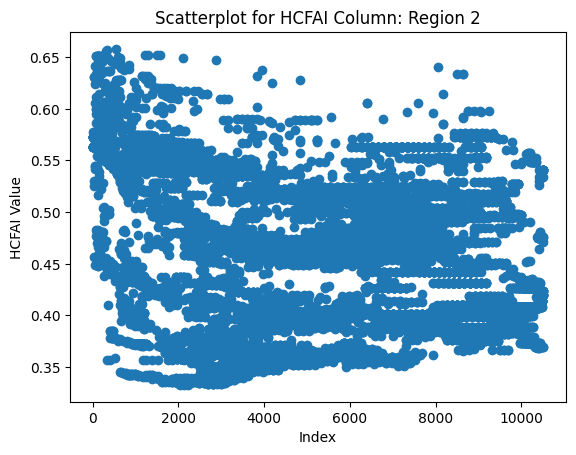

In [ ]:
# Scatterplot for the 'HCFAI' column
plt.scatter(x.index, x['HCFAI'])
plt.title(f'Scatterplot for HCFAI Column: Region {region}')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Feasibility Factors

In [ ]:
# a = a['buildability_landcov'].notna()
a = df[['Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov',
       'drought_value', 'rain intensity_value', 'flood_probability_value', 'HCFAI']]

a = a[a['RHU_Presence']==0]
a = a.sort_values(by='HCFAI', ascending=False)
a

,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5048,1,1,0,1.0,0.960775,0.430949,0.687815,0.654064
2596,1,1,0,1.0,1.141953,0.249932,0.361025,0.651058
1121,1,1,0,1.0,1.111672,0.289567,0.461596,0.650529
5267,1,0,0,1.0,0.848824,0.427353,0.224119,0.645940
5194,1,0,0,1.0,0.848824,0.427353,0.224119,0.645939
...,...,...,...,...,...,...,...,...
5590,0,0,0,NaN,1.046655,0.516940,0.426333,NaN
5591,0,0,0,NaN,1.088014,0.533677,0.440750,NaN
5596,1,1,0,NaN,0.864514,2.721783,0.598195,NaN
5680,0,1,0,NaN,0.797894,2.648136,1.438344,NaN


# Maximal Coverage Factors

In [ ]:
b = df[['popden_you', 'popden_wom', 'popden_eld', 'popden_chi',
       'popden_w_1', 'popden_all', 'Distance_to_Nearest_RHU_km', 'RHU_Presence', 'HCFAI']]
# b = b[b['buildability_landcov']==1]
b = b.sort_values(by='HCFAI', ascending=False)
# b[b['RHU_Presence']==1]
b

,popden_you,popden_wom,popden_eld,popden_chi,popden_w_1,popden_all,Distance_to_Nearest_RHU_km,RHU_Presence,HCFAI
5048,13.736079,41.149321,8.824771,8.173794,20.816993,363.896997,17.384668,0,0.654064
2596,5.296137,14.032293,2.747063,3.143041,6.904777,155.815402,31.481358,0,0.651058
1121,28.689414,77.553834,12.481618,19.290638,36.829012,125.914306,11.550333,0,0.650529
5267,0.000000,0.000000,0.000000,0.000000,0.000000,41.771628,25.204817,0,0.645940
5194,0.000000,0.000000,0.000000,0.000000,0.000000,124.261193,23.798066,0,0.645939
...,...,...,...,...,...,...,...,...,...
5590,0.000000,0.000000,0.000000,0.000000,0.000000,176.080449,19.736373,0,NaN
5591,0.000000,0.000000,0.000000,0.000000,0.000000,27.348926,19.029579,0,NaN
5596,46.984025,121.805750,14.989535,29.475215,64.996635,370.507160,15.552309,0,NaN
5680,0.000000,0.000000,0.000000,0.000000,0.000000,4.127558,18.802216,0,NaN


# EDA

In [ ]:
c=df['HCFAI'].notna()
c = df[c]
# c = df[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
#        'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
#         'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
#         'flood_probability_value', 'HCFAI']]
# c = c[c['RHU_Presence']==1]
c = c.sort_values(by='HCFAI', ascending=False)
c = c[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
       'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
        'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
        'flood_probability_value', 'HCFAI']]
c.sort_values(by='HCFAI', ascending=False)

,population_youth,population_women,population_elder60plus,population_children_under5,population_reproductive_women,popden_all_total_population,Distance_to_Nearest_RHU_km,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5703,0.000000,0.000000,0.0,0.000000,0.000000,376.429135,18.697599,1,0,0,1.0,0.542848,2.371210,0.962631,0.581876
1099,0.000000,0.000000,0.0,0.000000,0.000000,466.445625,24.862448,0,0,0,1.0,0.672856,0.268539,0.305392,0.563102
4334,0.000000,0.000000,0.0,0.000000,0.000000,1139.223628,29.861002,0,0,0,1.0,0.713175,0.153043,0.229447,0.534900
2704,0.000000,0.000000,0.0,0.000000,0.000000,23.816927,10.621421,0,0,0,1.0,0.834131,0.092033,0.815355,0.521743
3490,0.000000,0.000000,0.0,0.000000,0.000000,693.544396,13.991199,0,0,0,1.0,0.884191,0.099185,0.681102,0.516955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,11520.305136,21600.533088,0.0,2880.050256,12960.330264,50247.186329,2.858075,0,0,0,0.0,0.783897,2.857803,0.389312,0.481524
3937,0.000000,0.000000,0.0,0.000000,0.000000,2736.210123,11.314957,0,0,0,1.0,0.795406,1.766906,1.284616,0.480502
944,0.000000,0.000000,0.0,0.000000,0.000000,5875.884038,10.289214,0,0,0,0.0,0.686629,0.277878,0.934151,0.473992
5,0.000000,0.000000,0.0,0.000000,0.000000,4021.250203,16.685262,0,0,0,0.0,0.800627,1.151205,0.700863,0.467737


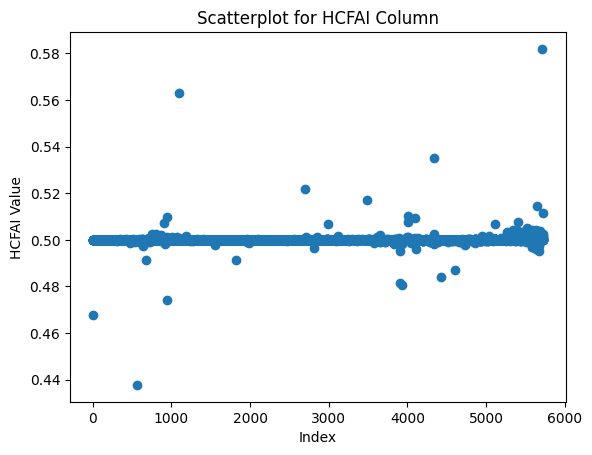

In [ ]:
# Scatterplot for the 'HCFAI' column
plt.scatter(c.index, c['HCFAI'])
plt.title('Scatterplot for HCFAI Column')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Exporting

In [ ]:
# Specify the file path for the CSV file
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI.csv'
# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)
print(f'DataFrame exported to CSV file: {csv_file_path}')

DataFrame exported to CSV file: /content/drive/MyDrive/MS thesis/HFCAI/RG2/rg2_HCFAI.csv
